In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
import scipy.io
import PIL.Image as pil
import PIL.ImageFilter as pilf
import ground_truth
import cv2

image_path = '../ShanghaiTech/part_A/train_data/images/IMG_1.jpg'
truth_path = '../ShanghaiTech/part_A/train_data/ground-truth/GT_IMG_1.mat'


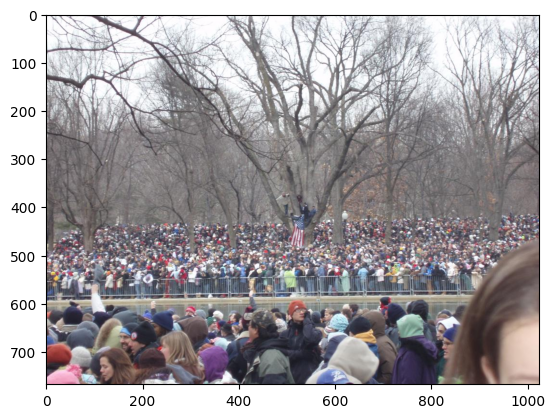

In [2]:
img = pil.open(image_path)
width, height = img.size
imgplot = plt.imshow(img)

In [3]:
gt_file = scipy.io.loadmat(truth_path)
gt = np.asarray(gt_file['image_info'][0][0][0][0][0])
count = int(gt_file['image_info'][0][0][0][0][1])
print("Number of people in image: " + str(count))




Number of people in image: 1546


In [22]:
##Don't need to merge xi after all, done later in code

##print(str(points_xi))
print("Input matrix: " + str(gt))
rot = np.rot90(gt, 1, axes=(0,1))
rot = np.flip(rot, axis=0)
##points_xi = points_xi.reshape(1,1546)
##print(str(points_xi))
##rot = np.concatenate((rot, points_xi), axis=0)
print("Rotated matrix:" + str(rot))
print("Max x: " + str(rot[0].max()) + "\nMax y: " + str(rot[1].max()))



Input matrix: [[ 29.6225116  472.92022152]
 [ 54.35533603 454.96602305]
 [ 51.79045053 460.46220626]
 ...
 [597.89732076 688.27900015]
 [965.77518336 638.44693908]
 [166.9965574  628.1873971 ]]
Rotated matrix:[[ 29.6225116   54.35533603  51.79045053 ... 597.89732076 965.77518336
  166.9965574 ]
 [472.92022152 454.96602305 460.46220626 ... 688.27900015 638.44693908
  628.1873971 ]]
Max x: 1021.8057177069301
Max y: 753.8667864092203


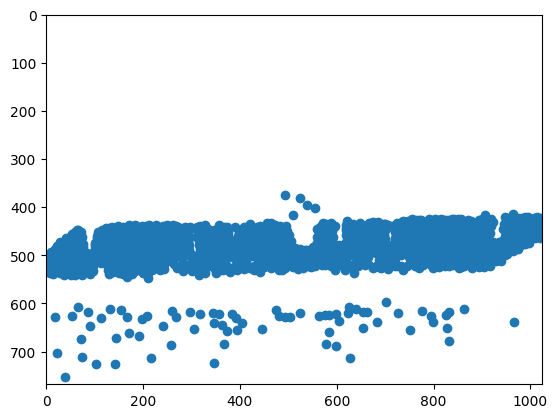

In [24]:
plt.gca().invert_yaxis()
plt.xlim(0,width)
plt.ylim(height,0)
plt.scatter(rot[0], rot[1])

[range(0, 1025), range(0, 769)]
[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])
 array([   0,    1,    2, ..., 1022, 1023, 1024])
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 

C:\Users\adietrich2\AppData\Local\Temp\ipykernel_10876\4210651185.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  hst = np.asarray(np.histogram2d(rot[0], rot[1], bins))


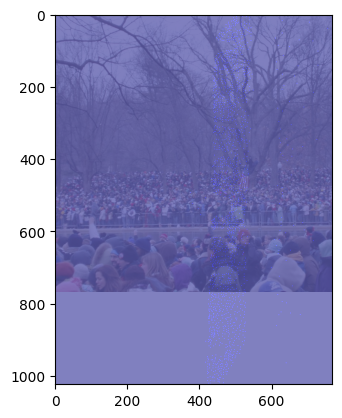

In [29]:
bins = [range(width + 1), range(height + 1)]


hst = np.asarray(np.histogram2d(rot[0], rot[1], bins))
print(str(bins))
print(str(hst))
hst = hst[0]
print("Sum of array (total people) = " + str(hst.sum()))
print("Max value of array (people/pix) = " + str(hst.max()))
print("Array dimensions = " + str(hst.shape) + "vs w*h = " + str(width) + "x" + str(height))

plt.imshow(img, alpha=0.5)
##pointMap = pil.fromarray(np.rot90(np.flip(255*hst.astype(np.uint8), axis=1), k=1, axes=(0,1)))
pointMap = pil.fromarray(255*hst.astype(np.uint8))

plt.imshow(pointMap, cmap = "jet", alpha=0.5)
plt.show()


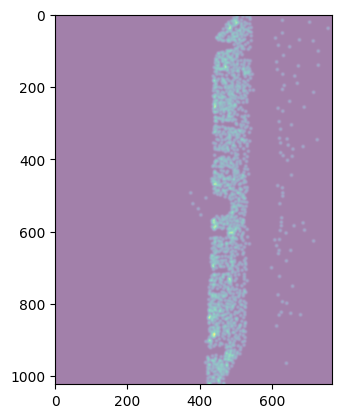

In [15]:

#heatMap = pil.new(mode='L', size=(width,height))
heatMap = cv2.GaussianBlur(hst,(0,0),3,3)

plt.imshow(heatMap, alpha=0.5)
